<a href="https://colab.research.google.com/github/mohamedshouaib/iti/blob/main/spervised_ML/Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and regularization

In [4]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 10.19 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression


In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

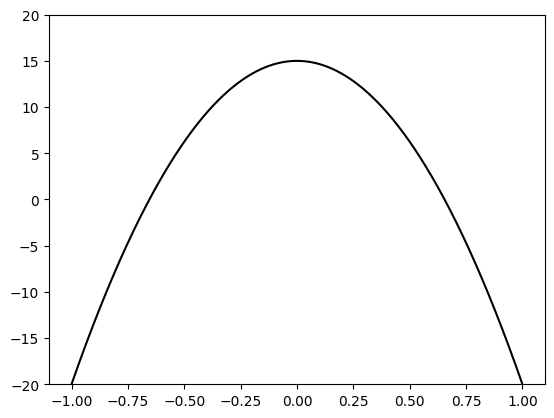

In [6]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [7]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

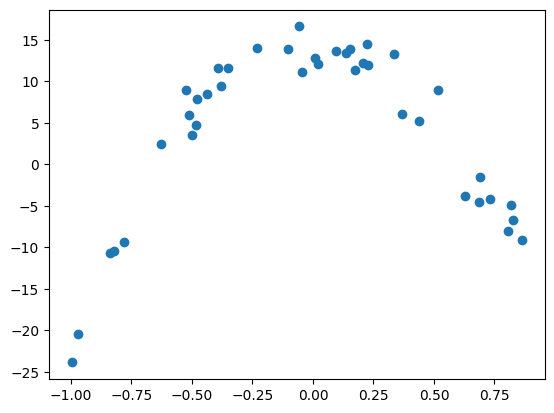

In [8]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [9]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

In [17]:
X

array([ 0.6888437 , -0.4821665 ,  0.02254944, -0.39337455, -0.04680609,
        0.00937371, -0.43632431, -0.49898732,  0.81949251,  0.8043319 ,
       -0.37970486,  0.36796786, -0.05571457,  0.22177395,  0.82602211,
        0.73061986, -0.47901538, -0.9719166 ,  0.43940937,  0.3363064 ,
       -0.99771436, -0.51217825, -0.34959127,  0.13502148, -0.52276814,
       -0.10406086, -0.83910836,  0.86566765, -0.78188431,  0.09488182,
        0.62893373,  0.20637126,  0.17523413, -0.23019771,  0.15130203,
       -0.62654094,  0.22554636, -0.82035128,  0.51520784,  0.68492045])

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=200, include_bias=False)  # Remove bias column (intercept)
X_poly = poly.fit_transform(np.array(X).reshape(-1,1))
X_poly

(40, 200)

In [14]:
X_poly.shape

(40, 200)

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [21]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(degree=200, include_bias=False)
    X = poly.fit_transform(np.array(X).reshape(-1,1))
    return X
X_poly=addPoly(X,200)

In [22]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [23]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [24]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [25]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data

model_no_reg = LinearRegression()
model_no_reg.fit(X_train,y_train)

LinearRegression()

Training error (rmse): 0.7509618690329751
Testing error (rmse): 107965370122.3274


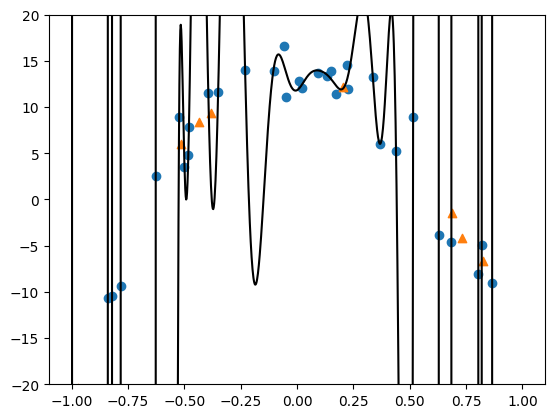

Polynomial coefficients
[11.82360119642342, 12.615841666257635, 905.6325620589481, -9386.36354192104, -68553.99192850538, 1138264.6928408043, -482695.466940472, -42886330.84976322, 92932213.18175152, 754575139.1684738, -2089742926.2654445, -7290118689.707855, 21757269045.607403, 40999106811.8734, -123832611365.12389, -132186387020.8204, 392066998145.91754, 212637894922.6481, -615546837118.5917, -62922103769.05386, 214207380627.5084, -199443595680.84198, 444165252055.44946, 14414292232.165627, -38161975904.71904, 191656887735.66818, -374774328021.7609, 152593830091.90417, -303207869063.90497, -3596508864.030271, -30317032988.582108, -133978175320.0535, 204561147306.51495, -175509766905.29523, 299561475501.6298, -138706441843.43387, 265692029089.5437, -62630560236.79046, 158466305937.9754, 17070632284.40965, 31778625494.0763, 79588303785.80673, -79449445705.08327, 117877748774.37254, -159561045518.0853, 133543292167.58466, -206274588949.96796, 132030696364.40027, -224397186492.65506, 119

In [26]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [27]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg = linear_model.Lasso()
model_L1_reg.fit(X_train,y_train)

Lasso()

Training error (rmse): 4.34644725948018
Testing error (rmse): 4.18349884356016


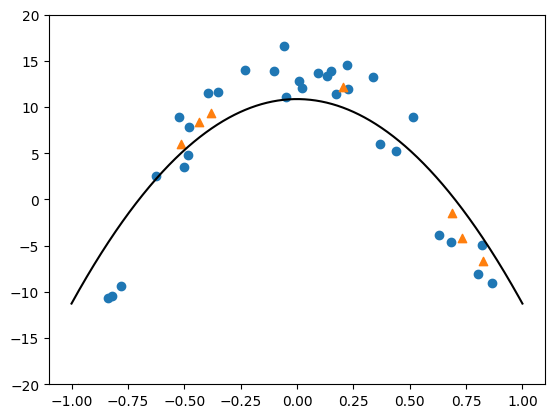

Polynomial coefficients
[10.865019152986564, 0.0, -22.13132480033644, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -

In [28]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [29]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg = linear_model.Ridge()
model_L2_reg.fit(X_train,y_train)

Ridge()

Training error (rmse): 3.140606302342108
Testing error (rmse): 2.3212956283296617


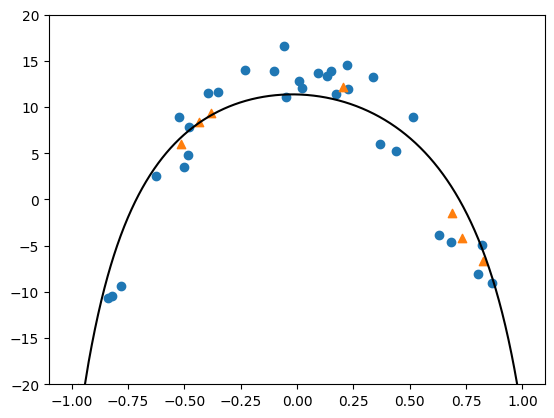

Polynomial coefficients
[11.36803639353135, -0.6174236161953474, -15.380722315117644, 0.6752181955125318, -9.18482087238405, 1.052730525894641, -5.453937676643944, 0.9467722089751673, -3.3280643261671274, 0.7231456516005055, -2.0745212603246137, 0.5082040817784298, -1.3103072550313783, 0.3366325343602262, -0.8320872035502155, 0.21034063224670535, -0.526842300685215, 0.121283843511158, -0.32905848922926206, 0.06003405793567497, -0.19942594587716717, 0.018559851120562618, -0.11370358052103192, -0.009230626414144072, -0.05662085617023026, -0.02770479413539015, -0.018398626470307808, -0.03989876552249737, 0.007305974850856808, -0.047885803488420337, 0.0246484883687232, -0.0530666215393059, 0.03637353177007624, -0.05638138631150351, 0.0443060677227855, -0.05845855210930853, 0.04966657245949095, -0.0597170606963133, 0.0532754339976287, -0.06043562164787754, 0.05568666787109848, -0.060799324194606486, 0.057276019651995386, -0.06093086048728086, 0.05829936614584058, -0.06091138823134602, 0.058

In [30]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [31]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.512178,5.980816,1.758132e+01,5.059385,6.761413
1,0.826022,-6.653701,3.524131e+05,-4.235461,-5.633332
2,-0.971917,-20.435354,-3.053722e+11,-10.040714,-24.636058
3,0.730620,-4.157484,2.419147e+05,-0.948801,-0.491006
4,-0.379705,9.412787,6.498267e-01,7.674218,9.129618
5,0.206371,12.218877,1.206025e+01,9.922466,10.574819
6,0.688844,-1.503314,6.571556e+03,0.363581,1.244822
7,-0.436324,8.437955,5.761767e+01,6.651682,8.257713


### Real Example (Predict fuel efficiency)

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [37]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [38]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [39]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [40]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [41]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
